In [2]:
#Which wineries produced the priciest wines and is there any correlation between price and points?

                 #######################          LIBRARIES                 #######################

#Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
                 #######################          DATAFRAME PREPARATION    #######################

#open the csv file and read as dataframe
wine = pd.read_csv("/Users/atyam/Desktop/M&M/winemag-data-130k-v2.csv")

In [4]:

                #######################          DATAFRAME CLEANING       #######################

#Remove duplicates from the dataframe based on the description column, use keep = first argument to keep one and remove 
#other duplicates for that row.

wine.drop_duplicates(subset=['description'], keep="first", inplace = True)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119955 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               119955 non-null int64
country                  119896 non-null object
description              119955 non-null object
designation              85423 non-null object
points                   119955 non-null int64
price                    111567 non-null float64
province                 119896 non-null object
region_1                 100397 non-null object
region_2                 46760 non-null object
taster_name              95043 non-null object
taster_twitter_handle    90514 non-null object
title                    119955 non-null object
variety                  119954 non-null object
winery                   119955 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.7+ MB


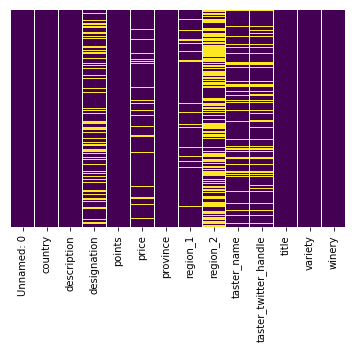

In [7]:
#Analyse the missing values

sns.heatmap(wine.isnull(), yticklabels=False, cbar=False, cmap='viridis')

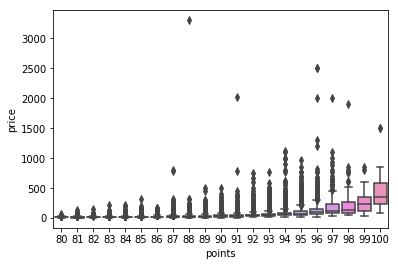

In [8]:
#Boxplot- Visualize and identify the outliers and some outliers are present, for points in range from 88 98. 
sns.boxplot(x="points", y = "price",data= wine)

In [9]:
    
#Subset the data from main dataframe and analyze further for the missing values
data_winery = wine[['winery','variety','price']]
data_winery.head()

,winery,variety,price
0,Nicosia,White Blend,NaN
1,Quinta dos Avidagos,Portuguese Red,15.0
2,Rainstorm,Pinot Gris,14.0
3,St. Julian,Riesling,13.0
4,Sweet Cheeks,Pinot Noir,65.0


In [10]:
#Analyse the dataframe metrics
data_winery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119955 entries, 0 to 129970
Data columns (total 3 columns):
winery     119955 non-null object
variety    119954 non-null object
price      111567 non-null float64
dtypes: float64(1), object(2)
memory usage: 8.7+ MB


In [11]:
#It is observed in the dataframe column "variety", there are missing price vlaues. Those missing values are filled 
#with mean of the particular grape variety by grouping it. While few grape variety/species which doesn't have a price value
# in the complete dataset. Those are filled with zero and they are analyzed in further steps. 

#Fill the missing values with the mean based on variety using grouping function. 
data_winery['price'] = data_winery['price'].fillna(data_winery.groupby('variety')['price'].transform('mean'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Now the missing values in the price are filled by average value with respect to the variety grape class. 

In [12]:
#Check anymore missing values; below are the few grape classes doesn't have a price value. 
data_winery[data_winery.isna().any(axis=1)]

,winery,variety,price
11639,Lionel Osmin & Cie,Ekigaïna,NaN
25841,Burja,Zelen,NaN
38757,O. Fournier,Tempranillo-Malbec,NaN
40162,Castell,Bacchus,NaN
63460,Duval-Leroy,Petit Meslier,NaN
73001,Clos Venturi,Biancu Gentile,NaN
73417,Domaine Seailles,Sauvignon Blanc-Sauvignon Gris,NaN
86909,Carmen,NaN,17.0
93558,Obrigado,Vital,NaN
95603,Conde Villar,Espadeiro,NaN


In [13]:
#Hence these could be handled by filling zeros. 

data_winery['price'].fillna(0, inplace= True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
# There is other NaN value in the variety colum, so fill "other".
data_winery['variety'].fillna("Other", inplace= True)

In [15]:
#Check any null values. The missing vlaues are handled.
data_winery[data_winery.isna().any(axis=1)]

,winery,variety,price


In [16]:
              #######################          ANALYSIS        ####################### 

#Which wines produced the priciest wines
Winery_priciest = data_winery.groupby(['winery'])['price'].max()

In [17]:
#The priciest wine produced by the winery is :
Winery_priciest.sort_values(ascending=False).head(1)

winery
Château les Ormes Sorbet    3300.0
Name: price, dtype: float64

In [18]:
             #######################          CORRELATION   #######################
#Join the new column points to the existing subseted dataframe
data_winery['points'] = wine['points']
data_winery.columns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['winery', 'variety', 'price', 'points'], dtype='object')

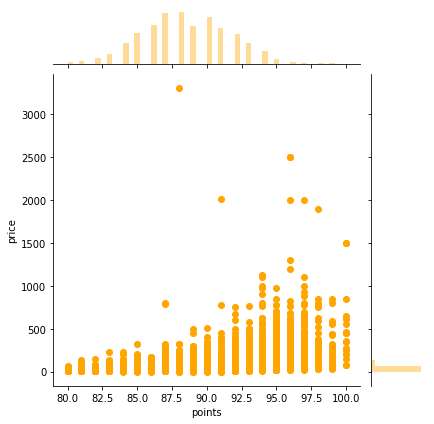

In [19]:
#Correlation between price and points- Scatter plot with histogram
sns.jointplot( x = data_winery['points'],y = data_winery['price'],color='orange')

In [20]:
#Correlation value between Price and Points 
data_winery.corr()

,price,points
price,1.000000,0.407895
points,0.407895,1.000000


In [ ]:
#The correlation is 0.407. Although the correlation is not strong it is posittive, it could be weak due to the outliers
#The points are normally distributed but price is left skewed. 

Pearson Correlation: (0.40789493416546324, 0.0)
                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 9.759e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:30:09   Log-Likelihood:            -6.7226e+05
No. Observations:              119955   AIC:                         1.345e+06
Df Residuals:                  119954   BIC:                         1.345e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pric

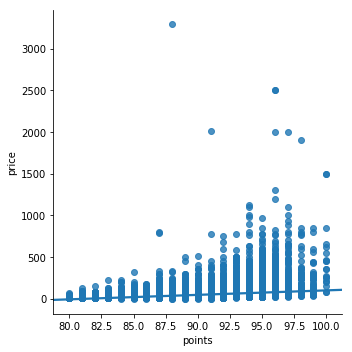

In [22]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(data_winery.price, data_winery.points))
print(sm.OLS(data_winery.points, data_winery.price).fit().summary())
sns.lmplot(y = 'price', x='points', data=data_winery)

# There is an average $1.1 increase for every one point increase in rating.